Task 3 - Object Detection Using YOLO

In [6]:
# Ensure you have the necessary dependencies installed
!pip install opencv-python
!pip install torch torchvision
!pip install pandas



In [2]:
!git clone https://github.com/ultralytics/yolov5.git

^C


In [9]:
import os
os.chdir('yolov5')


In [4]:
%cd yolov5


[WinError 2] The system cannot find the file specified: 'yolov5'
c:\Users\akili\Desktop\kifiya\week_7\Ethiopian_Medical_Business_DataWare_House\yolo5


C:\Users\akili\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [10]:
!pip install -r requirements.txt

In [2]:
!pip install torch
import cv2

from pathlib import Path
import logging

In [3]:
# Check if torch is installed
try:
    import torch
except ModuleNotFoundError:
    print("Installing torch...")
    !pip install torch torchvision

In [15]:
!python detect.py --source data/images --save-txt --save-conf --project results --name run1

detect: weights=yolov5s.pt, source=data/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=results, name=run1, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-321-g3742ab49 Python-3.11.1 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/3 C:\Users\akili\Desktop\kifiya\week_7\Ethiopian_Medical_Business_DataWare_House\yolo5\yolov5\data\images\9284.jpg: 640x640 (no detections), 244.2ms
image 2/3 C:\Users\akili\Desktop\kifiya\week_7\Ethiopian_Medical_Business_DataWare_House\yolo5\yolov5\data\images\9289.jpg: 640x640 (no detections), 180.0ms
image 3/3 C:\Users\akili\Desktop\kifiya\week_7\Ethiopian_Medical_Business_Data

Using cache found in C:\Users\akili/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-16 Python-3.11.1 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


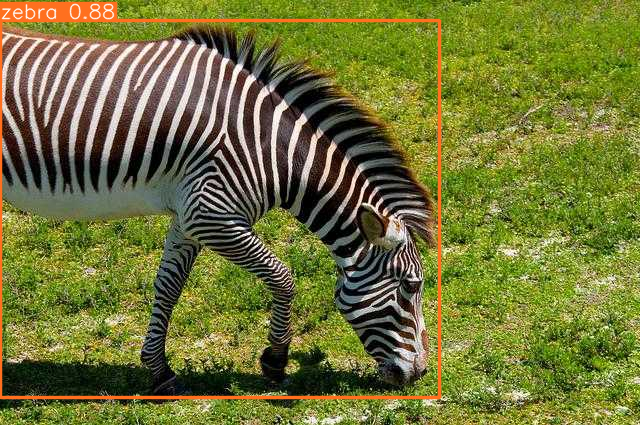

In [27]:
from PIL import Image
import torch

# Load YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set image path (absolute path)
image_path = 'datasets/coco8/images/train/000000000034.jpg'

# Perform object detection
results = model(image_path)

# Display the image with bounding boxes
results.show()

In [28]:
# Process the detection results
for detection in results.pandas().xyxy[0].iterrows():
    _, data = detection
    xmin, ymin, xmax, ymax = data[['xmin', 'ymin', 'xmax', 'ymax']]
    confidence = data['confidence']
    class_label = data['name']

    # Store the detection data to a database table

    # Print the detection results
    print(f"Object: {class_label}, Confidence: {confidence:.2f}, Bounding Box: ({xmin:.2f}, {ymin:.2f}, {xmax:.2f}, {ymax:.2f})")

Object: zebra, Confidence: 0.88, Bounding Box: (0.84, 20.21, 439.90, 397.72)
